# Draw model comparison figure

In [2]:
import sys

%load_ext autoreload
%autoreload 2
      
sys.path.append('../')

import torch
from dataset import data_loaders, BrainSegmentationDataset
from utils import postprocess_per_volume, dsc_distribution, plot_dsc, gray2rgb, outline
from skimage.io import imsave, imshow
import numpy as np
from matplotlib import pyplot as plt

from models.unet import UNet
import cv2

## Add original images

In [3]:
image = cv2.imread('../images/TCGA_HT_7616_19940813_19.tif', cv2.IMREAD_UNCHANGED)

# Save the image as PNG
cv2.imwrite('../images/model_comp_TCGA_HT_7616_19940813_origin.png', image)

image = cv2.imread('../images/TCGA_DU_7014_19860618_30.tif', cv2.IMREAD_UNCHANGED)

# Save the image as PNG
cv2.imwrite('../images/model_comp_TCGA_DU_7014_19860618_origin.png', image)



[ WARN:0@0.086] global loadsave.cpp:244 findDecoder imread_('../images/TCGA_HT_7616_19940813_19.tif'): can't open/read file: check file path/integrity


error: OpenCV(4.7.0) /Users/xperience/GHA-OCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp:783: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'


## Draw all the images in same figure

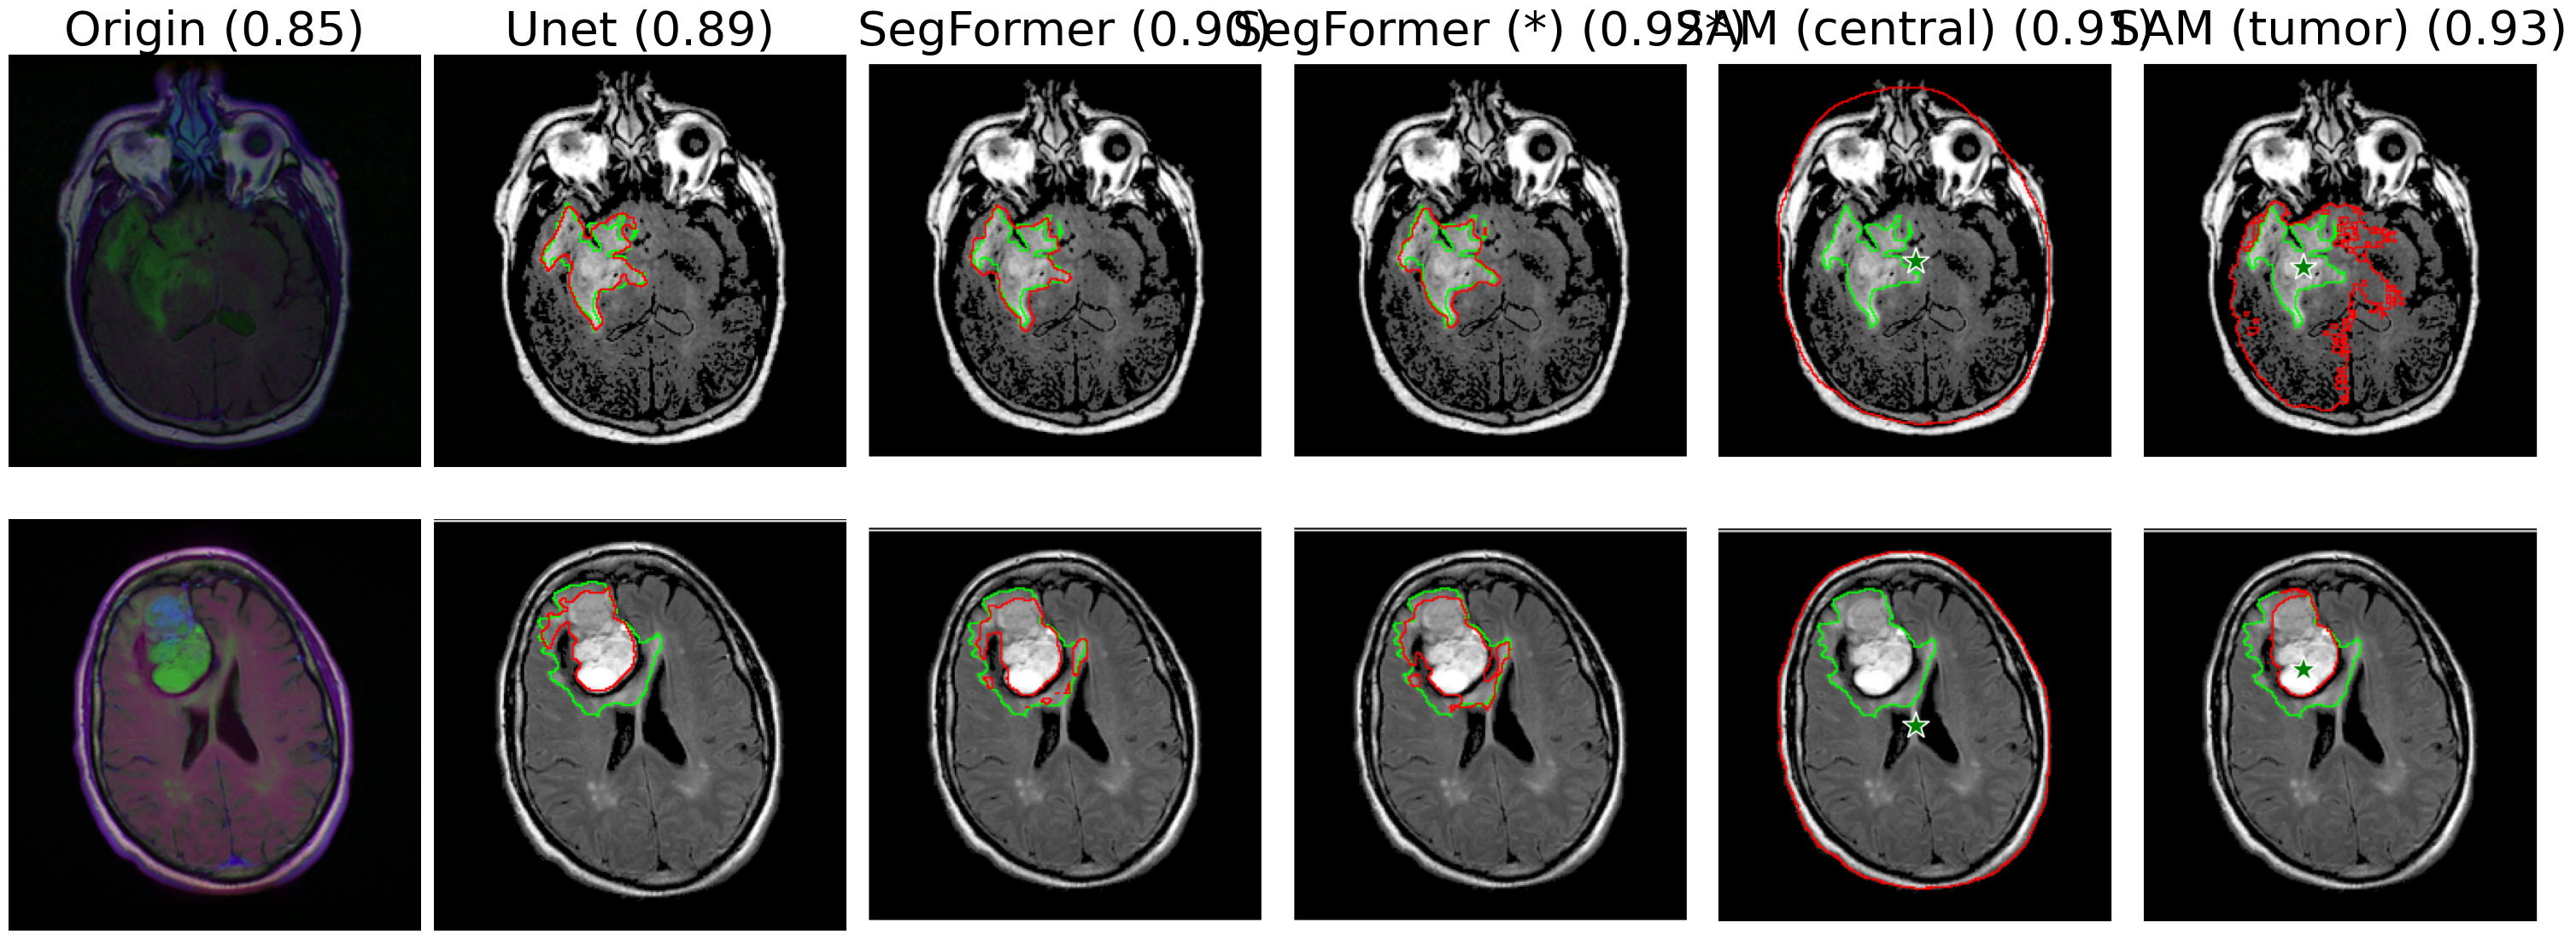

<Figure size 640x480 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_names = [
    "../images/model_comp_TCGA_DU_7014_19860618_origin.png",
    "../images/model_comp_TCGA_DU_7014_19860618_unet.png",
    "../images/model_comp_segf_w:0_pretrain2.png",
    "../images/model_comp_segf_w_pretrain2.png",
    "../images/model_comp_TCGA_DU_7014_19860618_SAM.png",
    "../images/model_comp_TCGA_DU_7014_19860618_SAM_tumor.png",
    "../images/model_comp_TCGA_HT_7616_19940813_origin.png",
    "../images/model_comp_TCGA_HT_7616_19940813_unet.png",
    "../images/model_comp_segf_w:0_pretrain.png",
    "../images/model_comp_segf_w_pretrain.png",
    "../images/model_comp_TCGA_HT_7616_19940813_SAM.png",
    "../images/model_comp_TCGA_HT_7616_19940813_SAM_tumor.png",
]

image_labels = [
    "Origin",
    "Unet",
    "SegFormer",
    "SegFormer*",
    "SAM (central)",
    "SAM (tumor)",
]

dice_sim_coeff = [
    "",
    "0.9045",
    "0.6271",
    "0.8808",
    "-",
    "-"
]

fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(30, 18)) # larger figure size and added a third row

for i, ax in enumerate(axes.flatten()):
    if i < len(image_names):
        img = mpimg.imread(image_names[i])
        ax.imshow(img)
    
    if i < 6:
        ax.set_title(f"{image_labels[i]} ({dice_sim_coeff[i]})", fontsize=40) # set title for the first row of subplots
    elif 6 <= i < 12:
        ax.set_title(image_labels[i - 6], fontsize=40) # set title for the second row of subplots
    else:
        ax.set_title("") # set an empty title for the third row of subplots
        
    # Add a comment explaining why the dice_sim_coeff values are not shown for the SAM model
    if i == 12:
        ax.text(0.5, 0.5, "*Dice similarity coefficient not shown for SAM model due to poor results", fontsize=20, ha="center", va="center", wrap=True)

    ax.axis('off')

plt.tight_layout()
plt.show()

plt.savefig("../images/model_comp_figure.png")


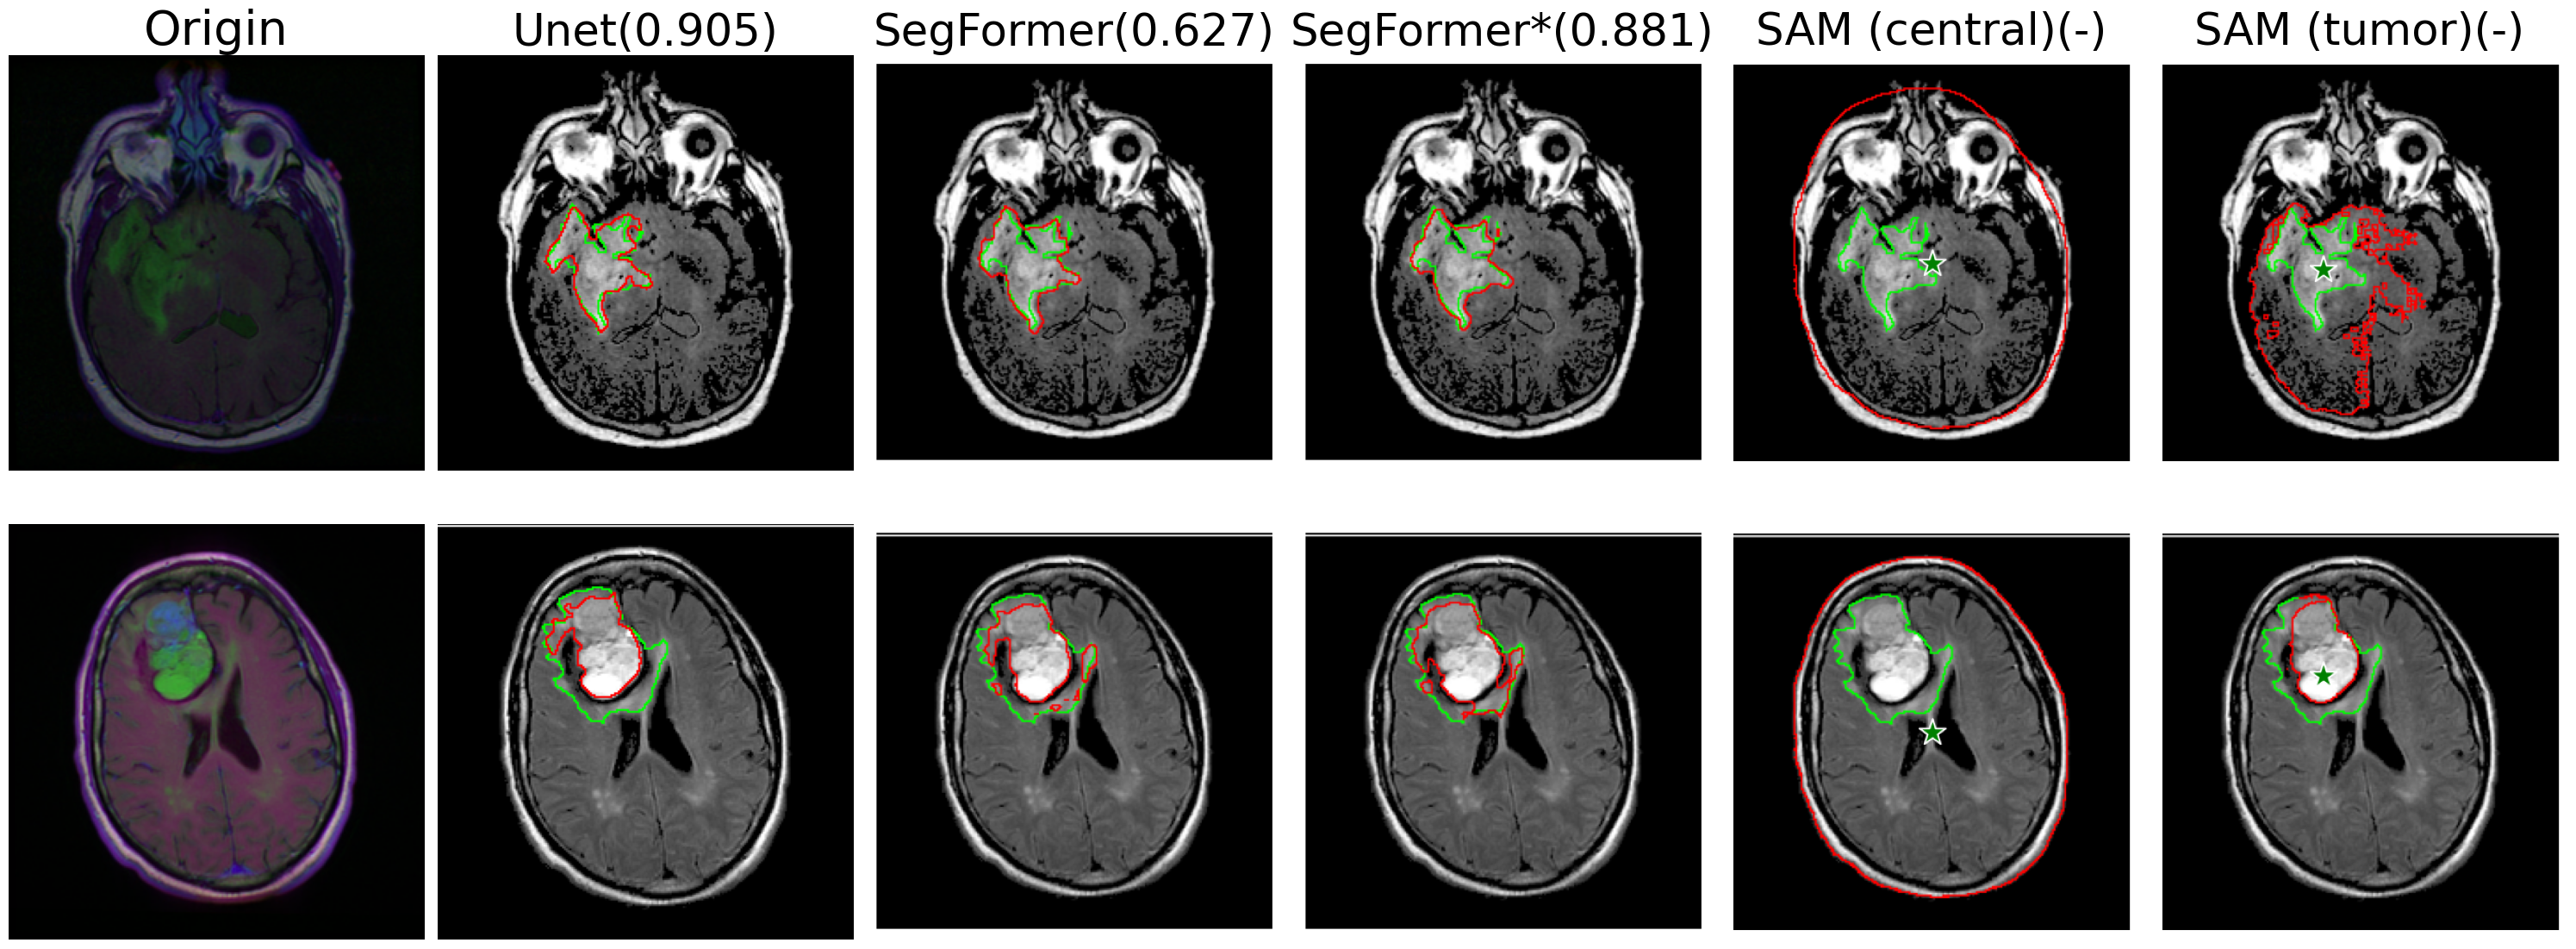

<Figure size 640x480 with 0 Axes>

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_names = [
    "../images/model_comp_TCGA_DU_7014_19860618_origin.png",
    "../images/model_comp_TCGA_DU_7014_19860618_unet.png",
    "../images/model_comp_segf_w:0_pretrain2.png",
    "../images/model_comp_segf_w_pretrain2.png",
    "../images/model_comp_TCGA_DU_7014_19860618_SAM.png",
    "../images/model_comp_TCGA_DU_7014_19860618_SAM_tumor.png",
    "../images/model_comp_TCGA_HT_7616_19940813_origin.png",
    "../images/model_comp_TCGA_HT_7616_19940813_unet.png",
    "../images/model_comp_segf_w:0_pretrain.png",
    "../images/model_comp_segf_w_pretrain.png",
    "../images/model_comp_TCGA_HT_7616_19940813_SAM.png",
    "../images/model_comp_TCGA_HT_7616_19940813_SAM_tumor.png",
]

image_labels = [
    "Origin",
    "Unet",
    "SegFormer",
    "SegFormer*",
    "SAM (central)",
    "SAM (tumor)",
]

dice_sim_coeff = [
    "",
    "0.905",
    "0.627",
    "0.881",
    "-",
    "-"
]

fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(30, 12)) # larger figure size

for i, ax in enumerate(axes.flatten()):
    img = mpimg.imread(image_names[i])
    ax.imshow(img)
    
    if 0 < i < 6:
        ax.set_title(f"{image_labels[i]}({dice_sim_coeff[i]})", fontsize=37) # set title only for the first row of subplots
    elif i == 0:
        ax.set_title(f"{image_labels[i]}", fontsize=40)
    else:
        ax.set_title("")
        
    ax.axis('off')

plt.tight_layout()
plt.show()

plt.savefig("../images/model_comp_figure.png")
